In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Unsupervised Learning

The diabetes example is an example of a supervised learning task -- we wanted to predict some value from a higher dimensional dataset. Sometimes, we do not have any output variable that we need to predict. Instead, we'd like to learn something about the structure of our data. This is the regime for unsupervised learning algorithms.

One unsupervised task would be to search for clusters in our data. Another may be decomposition or dimensionality reduction, where we want to find some lower-dimensional representation of our data that keeps as much of the relevant information intact as possible.

We'll run through a quick example of K-means clustering, and we'll look at dimensionality reduction as part of the next example. K-means clustering tries to separate data points into clusters with equal variance. It accomplishes this by minimizing the sum-of-squares within each cluster.

This example will use the iris dataset we looked at briefly at the beginning of the tutorial. The iris dataset has observations of various physical properties of different species of irises. Perhaps each species clusters in a different region of parameter space, and a clustering algorithm could tell us that there are separate categories in the data.

In [10]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target

In [11]:
from sklearn.cluster import KMeans

k_means = KMeans(n_clusters=3)
k_means.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

Let's see where the different clusters land in parameter space.

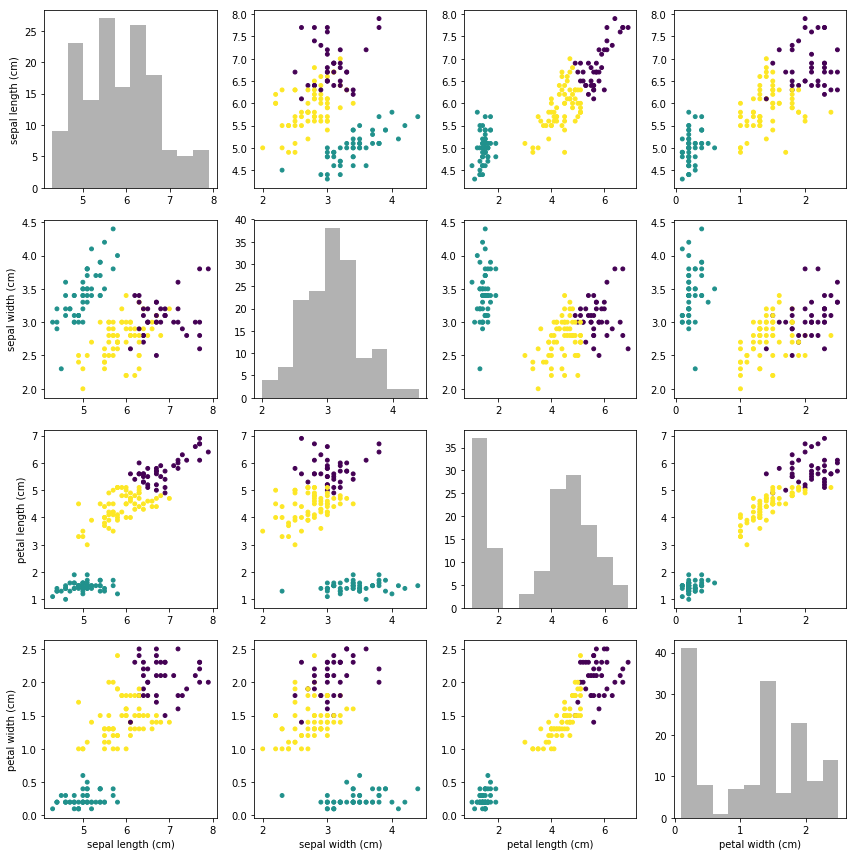

In [31]:
plt.figure(figsize=(12, 12))
for i in range(X.shape[-1]):
    for j in range(X.shape[-1]):
        plt.subplot(X.shape[-1], X.shape[-1], i+j*X.shape[-1]+1)
        if i==j:
            plt.hist(X[:, i], color='k', alpha=0.3)
        else:
            plt.scatter(X[:, i], X[:, j], c=k_means.labels_, s=15)
        if j==X.shape[-1]-1:
            plt.xlabel(iris.feature_names[i])
        if i==0:
            plt.ylabel(iris.feature_names[j])
plt.tight_layout()

Compare this to where the different species lie in parameter space.

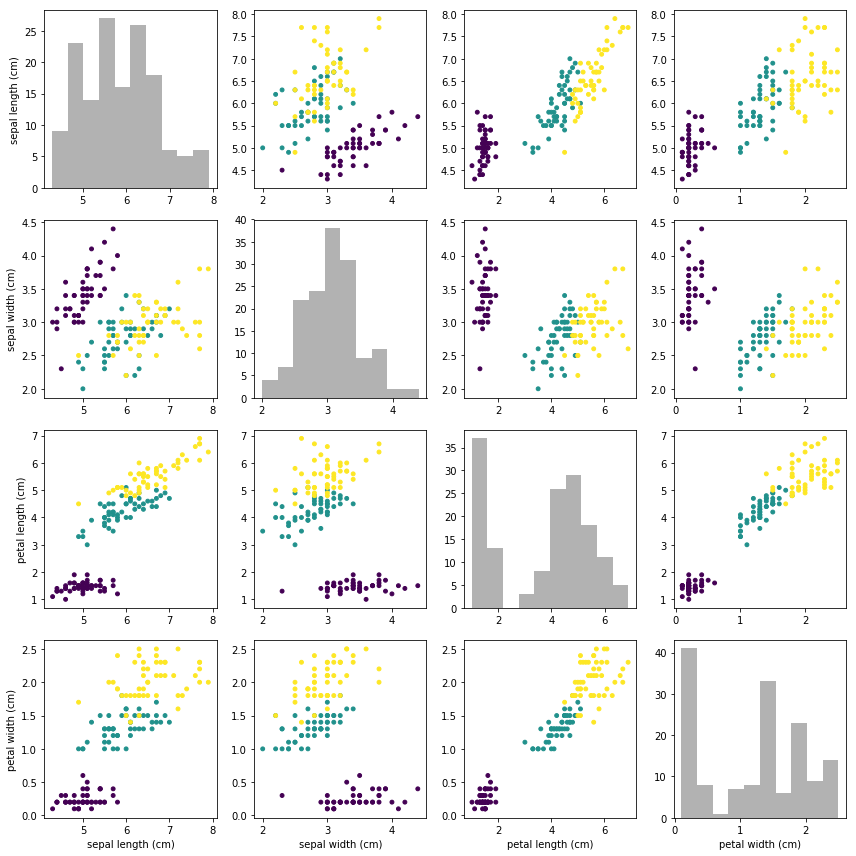

In [32]:
plt.figure(figsize=(12, 12))
for i in range(X.shape[-1]):
    for j in range(X.shape[-1]):
        plt.subplot(X.shape[-1], X.shape[-1], i+j*X.shape[-1]+1)
        if i==j:
            plt.hist(X[:, i], color='k', alpha=0.3)
        else:
            plt.scatter(X[:, i], X[:, j], c=y, s=15)
        if j==X.shape[-1]-1:
            plt.xlabel(iris.feature_names[i])
        if i==0:
            plt.ylabel(iris.feature_names[j])
plt.tight_layout()

It looks like the clustering algorithm was able to do a (qualitatively) good job at separating out the different species in the dataset.